In [1]:
import genetic as gen

In [2]:
from perlin_noise import PerlinNoise

In [3]:
import matplotlib.pyplot as plt

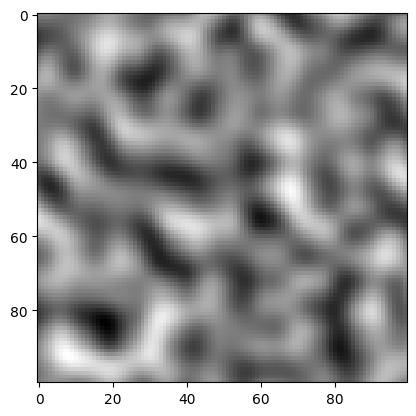

In [4]:
noise = PerlinNoise(octaves=8, seed=3)
xpix, ypix = 100, 100
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]

plt.imshow(pic, cmap='gray')
plt.show()

In [5]:
import numpy as np
from shapely import Point

In [6]:
population_points=np.fromiter((Point(int(i/7)/7,(i%7)/7) for i in range(49)),dtype=object)

first_gen=[gen.Candidate(None,p) for p in population_points]

ge=gen.GeneticPoints(fit_func=lambda p:noise([p.x,1-p.y]),minimize=True)

In [7]:
def plot_comparison(candidates:list):
    ge.calculate_fitness(candidates)

    plt.figure(figsize=(6.0, 3.0))
    plt.subplot(1,2,1)
    xpix, ypix = 100, 100
    pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]
    
    plt.imshow(pic, cmap='gray')
    
    plt.subplot(1, 2, 2)
    
    plt.xlim(.0,1.0)
    plt.ylim(.0,1.0)
    
    plt.grid()
    for c in candidates:
        x:float=c.value.x
        y:float=c.value.y
        
        f:float=np.clip(c.fitness,0,1)
        int_val = hex(int(255*(f)))[2:]
        if len(int_val)<2:
            int_val='0'+int_val
        color = '#'+((int_val)*3)
        
        plt.plot([x],[y],marker='o',markersize=10,markeredgecolor=color,markerfacecolor=color)
    plt.show()

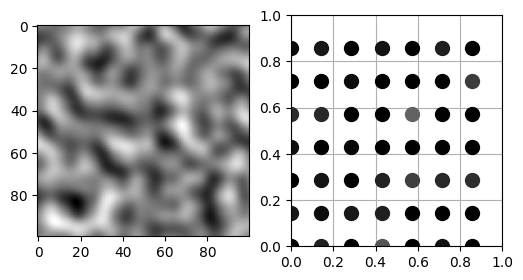

49

In [8]:
plot_comparison(first_gen)
len(first_gen)

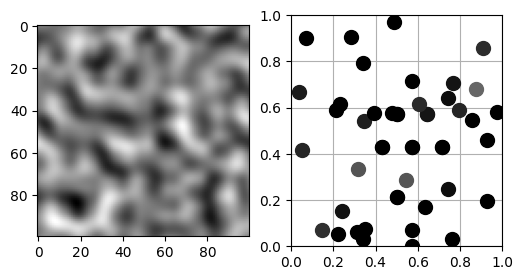

In [9]:
new_gen=ge.next_gen(first_gen)
plot_comparison(new_gen)

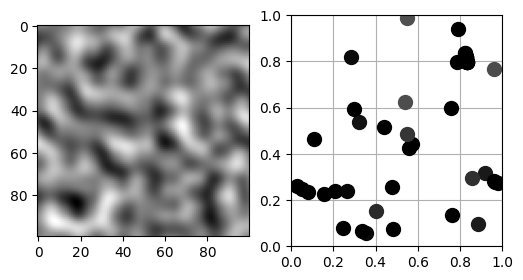

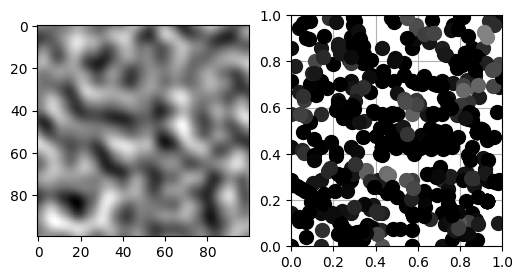

47

In [10]:
from itertools import chain


for i in range(10):
    ge.next_gen()
    
plot_comparison(ge.last_candidates)    
plot_comparison(list(chain(*ge.all_candidates.values())))
len(ge.last_candidates)

In [11]:
print(ge.last_candidates)

[Candidate(fitness=-0.46694941545539714, value=<POINT (0.822 0.839)>), Candidate(fitness=-0.4438775922760788, value=<POINT (0.834 0.797)>), Candidate(fitness=-0.4438775922760788, value=<POINT (0.834 0.797)>), Candidate(fitness=-0.4438775922760788, value=<POINT (0.834 0.797)>), Candidate(fitness=-0.46694941545539714, value=<POINT (0.822 0.839)>), Candidate(fitness=-0.5037811994861693, value=<POINT (0.828 0.818)>), Candidate(fitness=-0.5037811994861693, value=<POINT (0.828 0.818)>), Candidate(fitness=-0.5037811994861693, value=<POINT (0.828 0.818)>), Candidate(fitness=-0.4438775922760788, value=<POINT (0.834 0.797)>), Candidate(fitness=-0.5037811994861693, value=<POINT (0.828 0.818)>), Candidate(fitness=-0.5037811994861693, value=<POINT (0.828 0.818)>), Candidate(fitness=-0.4438775922760788, value=<POINT (0.834 0.797)>), Candidate(fitness=-0.4438775922760788, value=<POINT (0.834 0.797)>), Candidate(fitness=-0.5037811994861693, value=<POINT (0.828 0.818)>), Candidate(fitness=0.31474609208